# Performing Data Pre-Processing

# Importing Libraries

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Loading Dataset

In [2]:
dataset=pd.read_csv("Diamonds Prices2022.csv")

In [3]:
dataset

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335
...,...,...,...,...,...,...,...,...,...,...,...
53938,53939,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,2757
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,5.83,5.87,3.64,2757
53940,53941,0.71,Premium,E,SI1,60.5,55.0,5.79,5.74,3.49,2756
53941,53942,0.71,Premium,F,SI1,59.8,62.0,5.74,5.73,3.43,2756


# Extracting Independent Variable And Dependent Variable

In [4]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [5]:
X

array([[1, 0.23, 'Ideal', ..., 3.95, 3.98, 2.43],
       [2, 0.21, 'Premium', ..., 3.89, 3.84, 2.31],
       [3, 0.23, 'Good', ..., 4.05, 4.07, 2.31],
       ...,
       [53941, 0.71, 'Premium', ..., 5.79, 5.74, 3.49],
       [53942, 0.71, 'Premium', ..., 5.74, 5.73, 3.43],
       [53943, 0.7, 'Very Good', ..., 5.71, 5.76, 3.47]], dtype=object)

In [6]:
y

array([ 326,  326,  327, ..., 2756, 2756, 2757])

In [7]:
column_to_drop = 1
X = np.delete(X, column_to_drop, axis=1)
print(X)

[[1 'Ideal' 'E' ... 3.95 3.98 2.43]
 [2 'Premium' 'E' ... 3.89 3.84 2.31]
 [3 'Good' 'E' ... 4.05 4.07 2.31]
 ...
 [53941 'Premium' 'E' ... 5.79 5.74 3.49]
 [53942 'Premium' 'F' ... 5.74 5.73 3.43]
 [53943 'Very Good' 'E' ... 5.71 5.76 3.47]]


In [8]:
dataset["cut"].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [9]:
dataset["color"].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [10]:
dataset["clarity"].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

# Doing Encoding

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
ct=ColumnTransformer(transformers=[('encoder',OrdinalEncoder(),[1,2,3])],remainder="passthrough")
X=np.array(ct.fit_transform(X))

In [23]:
X

array([[1.0, 2.0, 3.0, ..., 3.95, 3.98, 2.43],
       [1.0, 3.0, 2.0, ..., 3.89, 3.84, 2.31],
       [1.0, 1.0, 4.0, ..., 4.05, 4.07, 2.31],
       ...,
       [1.0, 3.0, 2.0, ..., 5.79, 5.74, 3.49],
       [2.0, 3.0, 2.0, ..., 5.74, 5.73, 3.43],
       [1.0, 4.0, 5.0, ..., 5.71, 5.76, 3.47]], dtype=object)

In [24]:
print(X[:5])

[[1.0 2.0 3.0 0.0 61.5 55.0 3.95 3.98 2.43]
 [1.0 3.0 2.0 1.0 59.8 61.0 3.89 3.84 2.31]
 [1.0 1.0 4.0 2.0 56.9 65.0 4.05 4.07 2.31]
 [5.0 3.0 5.0 3.0 62.4 58.0 4.2 4.23 2.63]
 [6.0 1.0 3.0 4.0 63.3 58.0 4.34 4.35 2.75]]


In [25]:
print(X[-5:])

[[4.0 3.0 3.0 53938.0 61.0 58.0 6.15 6.12 3.74]
 [0.0 2.0 3.0 53939.0 62.2 55.0 5.83 5.87 3.64]
 [1.0 3.0 2.0 53940.0 60.5 55.0 5.79 5.74 3.49]
 [2.0 3.0 2.0 53941.0 59.8 62.0 5.74 5.73 3.43]
 [1.0 4.0 5.0 53942.0 60.5 59.0 5.71 5.76 3.47]]


# Splitting The Dataset Into Train And Test Dataset

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [28]:
X_train

array([[3.0, 4.0, 2.0, ..., 4.75, 4.77, 2.97],
       [2.0, 2.0, 7.0, ..., 4.8, 4.78, 2.93],
       [3.0, 3.0, 6.0, ..., 4.37, 4.35, 2.61],
       ...,
       [3.0, 4.0, 5.0, ..., 6.05, 6.0, 3.78],
       [6.0, 2.0, 4.0, ..., 6.79, 6.82, 4.2],
       [1.0, 2.0, 6.0, ..., 4.41, 4.43, 2.69]], dtype=object)

In [29]:
X_test

array([[6.0, 1.0, 2.0, ..., 5.03, 5.07, 3.19],
       [3.0, 4.0, 5.0, ..., 7.59, 7.69, 4.55],
       [3.0, 3.0, 6.0, ..., 4.4, 4.33, 2.64],
       ...,
       [1.0, 2.0, 7.0, ..., 4.34, 4.37, 2.67],
       [1.0, 2.0, 7.0, ..., 4.25, 4.21, 2.55],
       [1.0, 4.0, 6.0, ..., 4.03, 4.06, 2.44]], dtype=object)

In [30]:
y_train

array([ 698, 1192, 1046, ..., 3776, 5182,  813])

In [32]:
y_test

array([  912, 13037,  1046, ...,   864,   828,   521])

# Perfroming EDA

In [41]:
dataset = dataset.drop("Unnamed: 0", axis=1)

In [42]:
# Doing Statistics Stuff
dataset.describe()

,carat,depth,table,x,y,z,price
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,0.797935,61.749322,57.457251,5.731158,5.734526,3.538730,3932.734294
std,0.473999,1.432626,2.234549,1.121730,1.142103,0.705679,3989.338447
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,950.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5324.000000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000


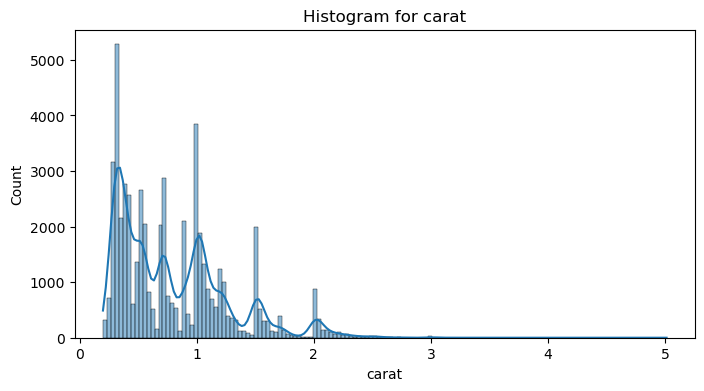

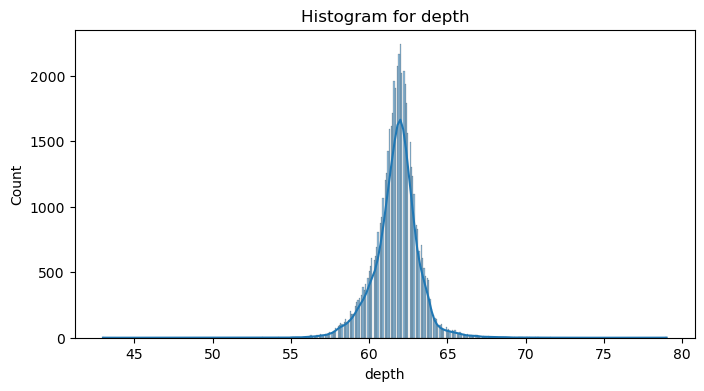

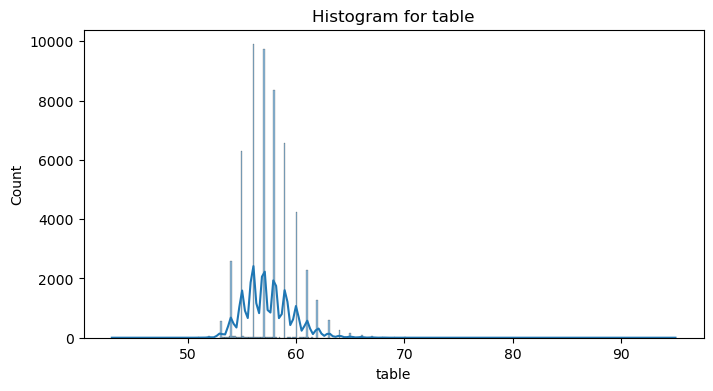

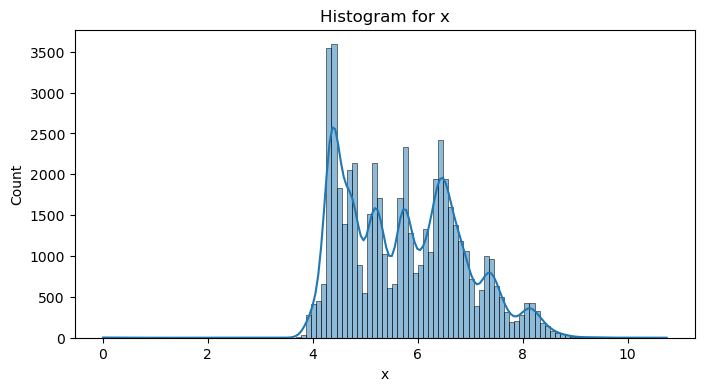

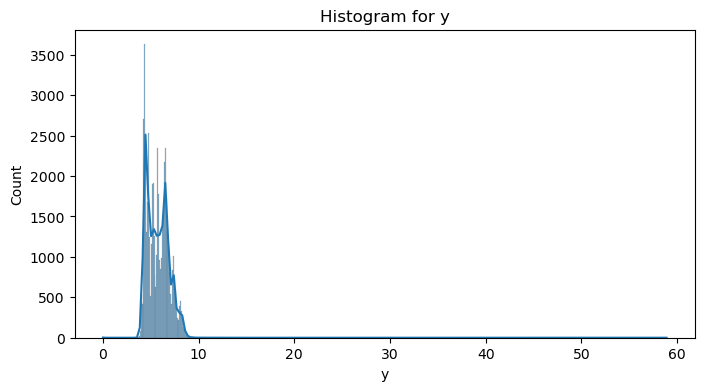

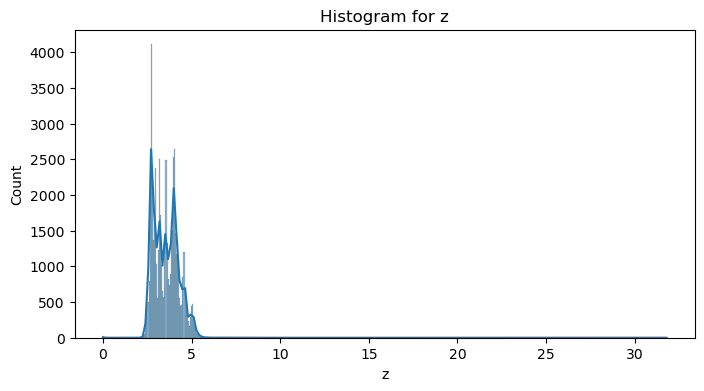

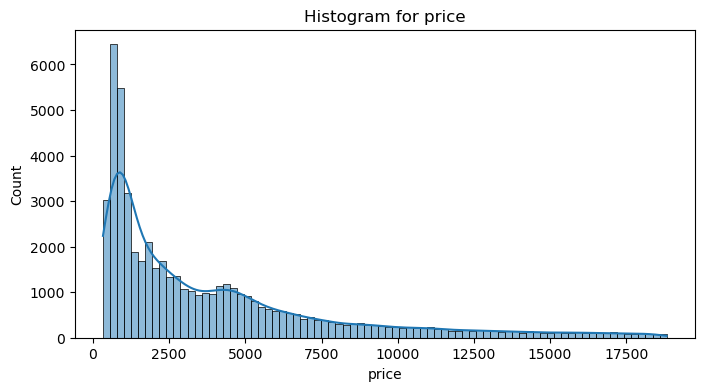

In [43]:
numerical_variables = dataset.select_dtypes(include=['float64', 'int64']).columns

for var in numerical_variables:
    plt.figure(figsize=(8, 4))
    sns.histplot(dataset[var], kde=True)
    plt.title(f'Histogram for {var}')
    plt.show()

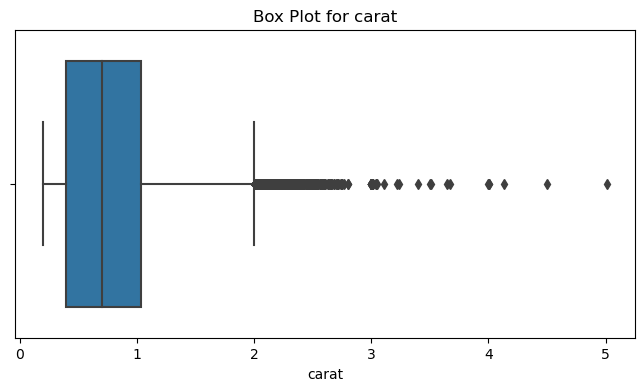

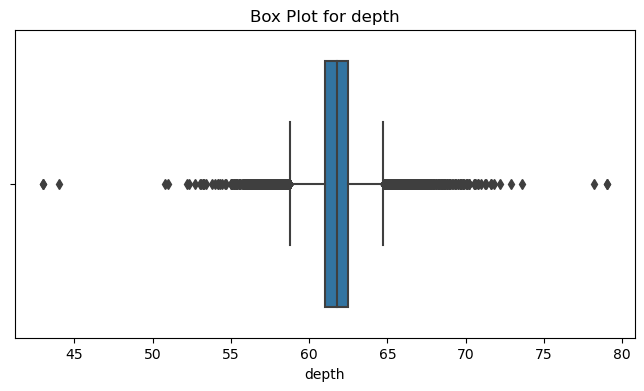

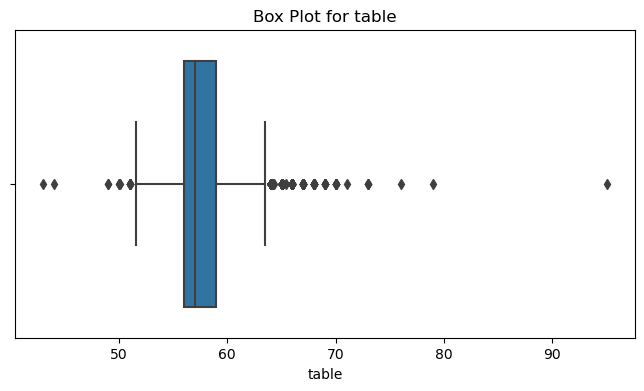

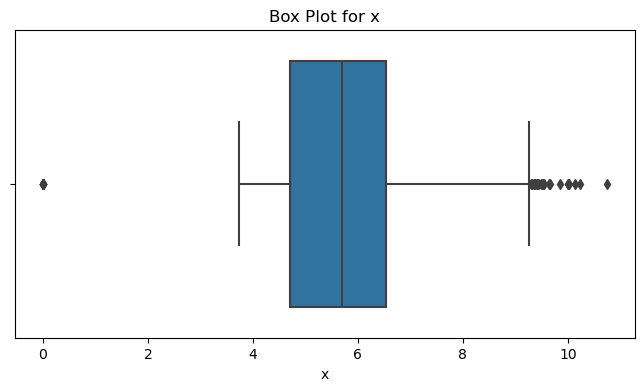

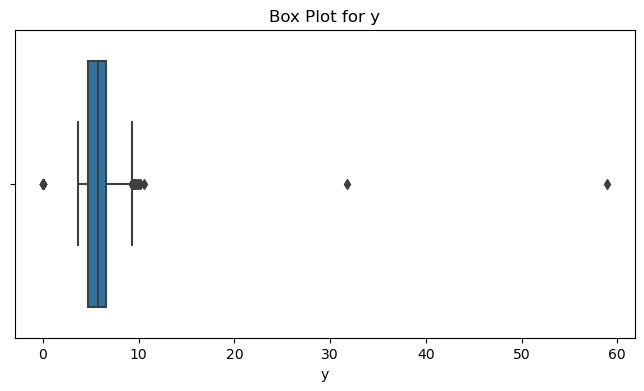

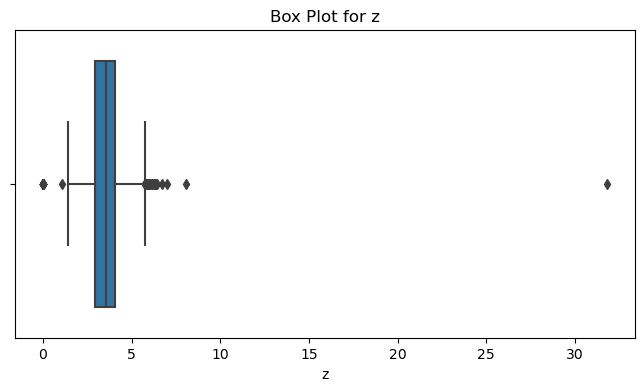

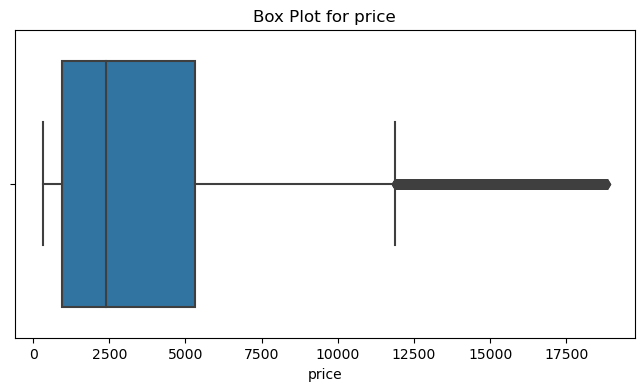

In [44]:
for var in numerical_variables:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=dataset[var])
    plt.title(f'Box Plot for {var}')
    plt.show()

/var/folders/5x/7cgxntk15v7d4vjry7cgwd400000gn/T/ipykernel_4411/2587750426.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


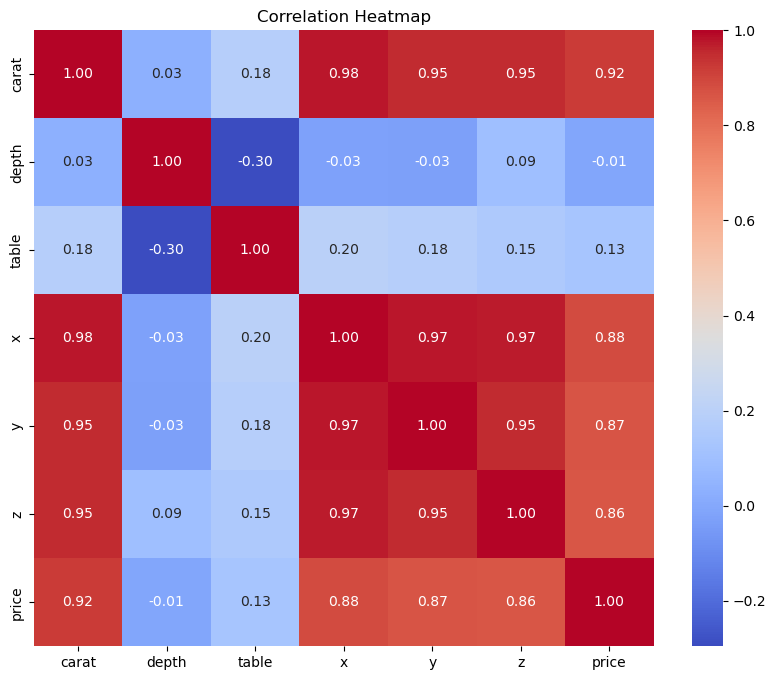

In [45]:
correlation_matrix = dataset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


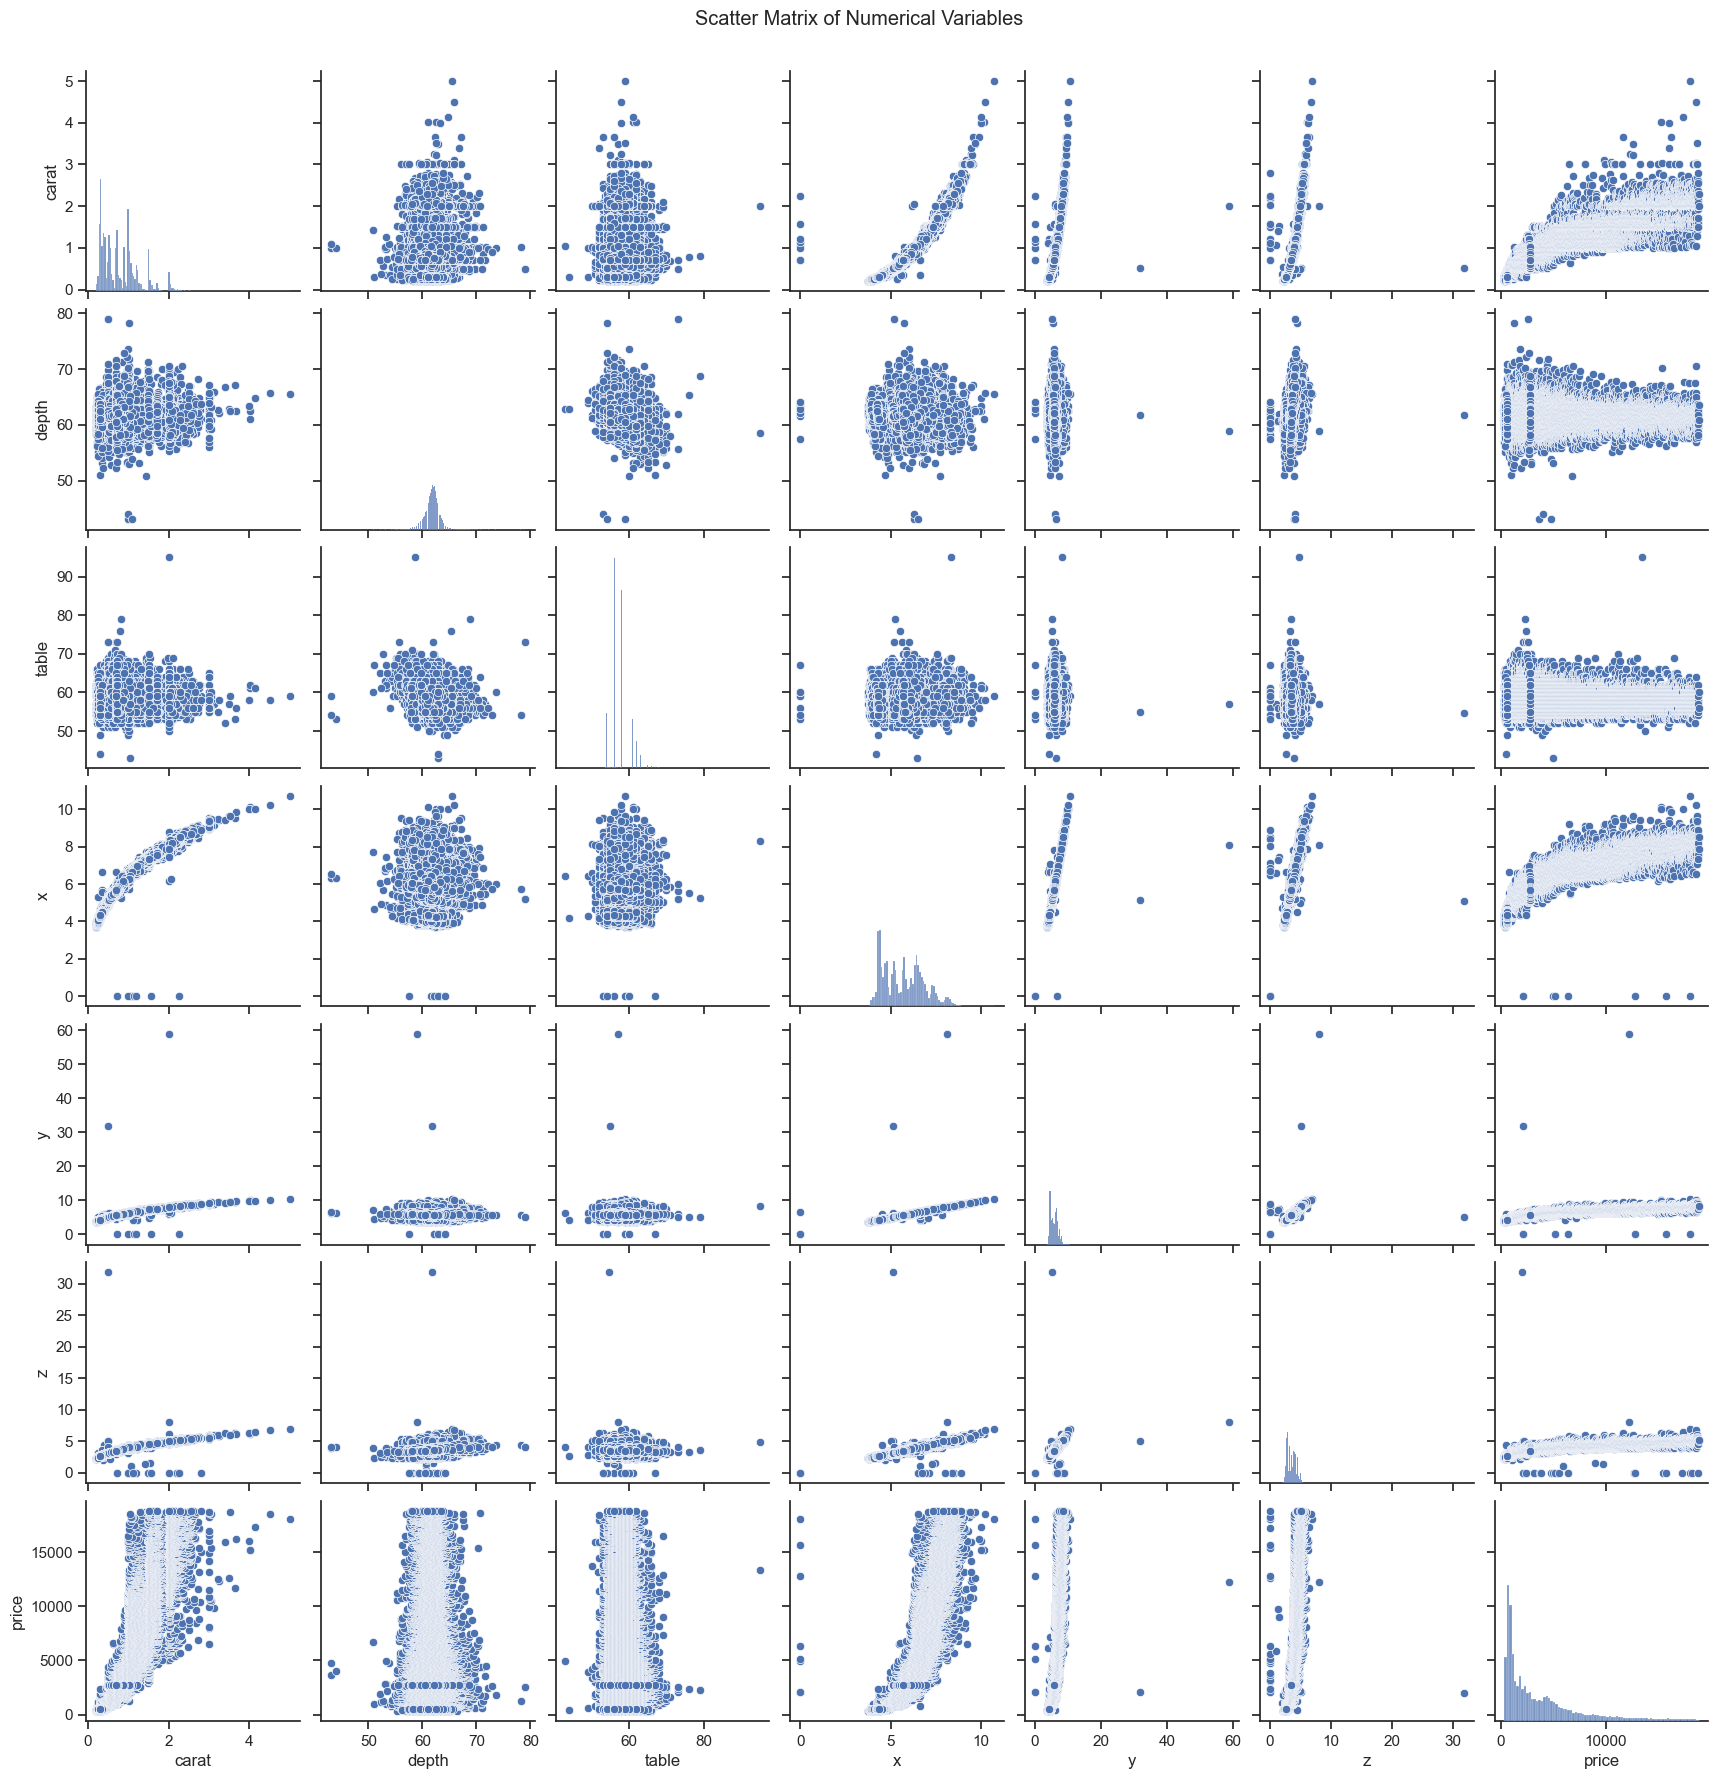

In [46]:
sns.set(style="ticks")
sns.pairplot(dataset)
plt.suptitle('Scatter Matrix of Numerical Variables', y=1.02)
plt.show()


# Doing Modeling

In [33]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [34]:
y_pred=regressor.predict(X_test)
np.set_printoptions(precision=3)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[  564.609   912.   ]
 [10575.068 13037.   ]
 [  -83.791  1046.   ]
 ...
 [  630.005   864.   ]
 [   99.748   828.   ]
 [ -865.375   521.   ]]
